## mediapipe 실습

In [ ]:
%pip install mediapipe

In [11]:
import cv2
import mediapipe as mp
import numpy as np

In [12]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose  # pose 선택

In [21]:
# 이미지 파일
IMAGE_FILES = []
BG_COLOR = (192, 192, 192)  # 회색
image = r"C:\Users\Playdata\Downloads\attend_test_imgs\928_H_2.jpg"

In [22]:
## mp_pose.Pose 객체 생성, 초기화
with mp_pose.Pose(
        static_image_mode=True,    # 사진일 때 이 설정
        model_complexity=2,        # model_complexity=2: 모델 복잡도
        enable_segmentation=True,  # 분할 마스크(segmentation mask) 활성화 여부
        min_detection_confidence=0.5) as pose:  # 포즈 감지에 대한 최소 신뢰도 임계값

    # for idx, file in enumerate(IMAGE_FILES):
    #     image = cv2.imread(file)
    #     image_height, image_width, _ = image.shape
    #     # 처리 전 BGR 이미지를 RGB로 변환합니다.
    #     results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    image = cv2.imread(image)
    image_height, image_width, _ = image.shape
    print(image_height, image_width, _)
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    ## 코 landmarks 출력
    print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
        )



3000 4000 3
Nose coordinates: (2286.0913276672363, 552.9536604881287)


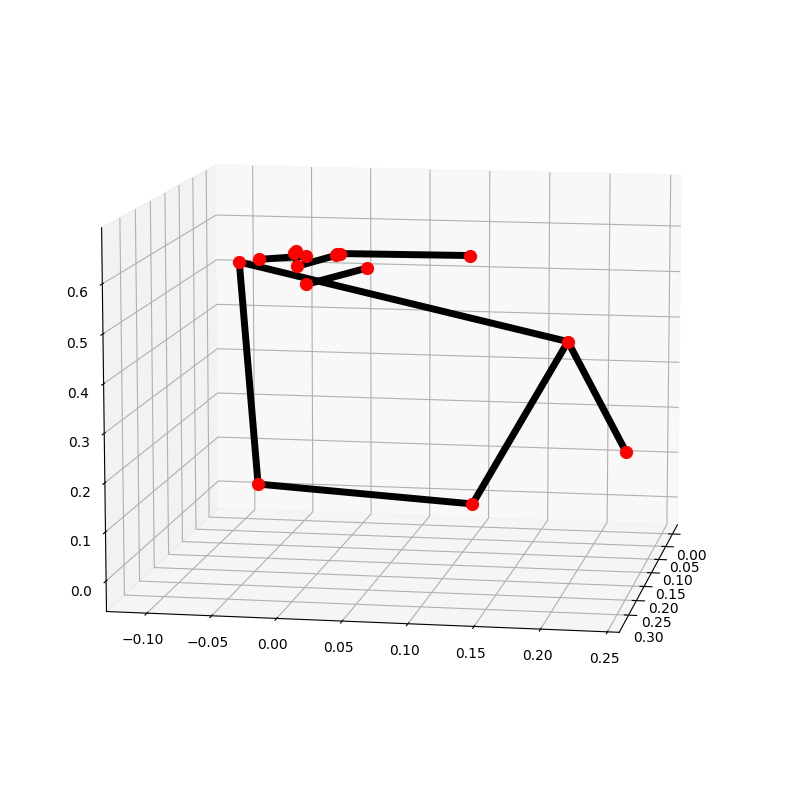

In [25]:

annotated_image = image.copy()
# 이미지를 분할합니다.
# 경계 주변의 분할을 개선하려면 "image"가 있는
# "results.segmentation_mask"에 공동 양방향 필터를 적용하는 것이 좋습니다.
condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image = np.zeros(image.shape, dtype=np.uint8)
bg_image[:] = BG_COLOR
annotated_image = np.where(condition, annotated_image, bg_image)

# 이미지 위에 포즈 랜드마크를 그립니다.
mp_drawing.draw_landmarks(
    annotated_image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

cv2.imwrite(r"C:\Users\Playdata\Downloads\attend_test_imgs\928_H_2.jpg", annotated_image)
            
# 포즈 월드 랜드마크를 그립니다.
mp_drawing.plot_landmarks(
    results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

## mediapipe 사용법

### 0.pip install

In [ ]:
%pip install mediapipe  

In [28]:
# import
import cv2
import mediapipe as mp
import numpy as np

### 1. 사전 설정

In [29]:
# mp.solutions : MediaPipe 라이브러리의 고수준 api 제공 모듈
mp_drawing = mp.solutions.drawing_utils  # drawing_urils 모듈 mp_drawing 변수에 할당
mp_drawing_styles = mp.solutions.drawing_styles  # drawing_styles 모듈은 랜드마크와 연결선들을 그릴 때 사용되는 스타일(색상, 선 굵기 등)을 정의하는 도구를 제공
mp_pose = mp.solutions.pose  # pose 모듈을 mp_pose 변수에 할당,  pose 솔루션은 이미지나 비디오에서 사람 몸의 포즈(pose)를 추정하기 위해 사용

### mp_pose만 설정하면 될듯 !! 우리는 그림은 안그릴 것이기 때문

### 2. 모델 사용
[좌표](C:\Users\Playdata\Downloads\mediapipe_pose좌표.png)

In [ ]:
BG_COLOR = (192, 192, 192)  # 회색
image = r"C:\Users\Playdata\Downloads\attend_test_imgs\928_H_2.jpg"  # 이미지 경로

## mp_pose.Pose 객체 생성, 초기화
with mp_pose.Pose(
        static_image_mode=True,    # 사진일 때 이 설정
        model_complexity=2,        # model_complexity=2: 모델 복잡도
        enable_segmentation=True,  # 분할 마스크(segmentation mask) 활성화 여부
        min_detection_confidence=0.5) as pose:  # 포즈 감지에 대한 최소 신뢰도 임계값

    image = cv2.imread(image)
    image_height, image_width, _ = image.shape
    print(image_height, image_width, _)
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    ## 코 landmarks 출력 >> 다른 좌표도 사진 참고해서 뽑으면 됨 !!
    print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
        )